In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BTCUSDT-bookTicker-2024-02-06.csv')

In [3]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,1707177600000,1707177600004
1,3939719410110,43233.4,0.846,43233.6,10.399,1707235233178,1707235233182
2,3936653543872,42692.9,0.584,42693.0,5.645,1707177600000,1707177600004
3,3939719410130,43233.4,0.846,43233.6,10.636,1707235233178,1707235233182
4,3936653543878,42692.9,0.562,42693.0,5.645,1707177600000,1707177600004


In [4]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], unit='ms')

In [5]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004
1,3939719410110,43233.4,0.846,43233.6,10.399,2024-02-06 16:00:33.178,1707235233182
2,3936653543872,42692.9,0.584,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004
3,3939719410130,43233.4,0.846,43233.6,10.636,2024-02-06 16:00:33.178,1707235233182
4,3936653543878,42692.9,0.562,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004


In [6]:
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [7]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004
1,3939719410110,43233.4,0.846,43233.6,10.399,2024-02-06 16:00:33.178,2024-02-06 16:00:33.182
2,3936653543872,42692.9,0.584,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004
3,3939719410130,43233.4,0.846,43233.6,10.636,2024-02-06 16:00:33.178,2024-02-06 16:00:33.182
4,3936653543878,42692.9,0.562,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004


In [8]:
grouped = df.groupby([df['transaction_time'].dt.hour])

In [9]:
grouped['update_id'].count()

transaction_time
0      883747
1      955074
2     1165062
3      867975
4      849887
5      814240
6      829777
7      809152
8     1451969
9     1123615
10    1620430
11    1307003
12    1283219
13    1412374
14    1482887
15    1855624
16    1921017
17    1283150
18    1077940
19    1015262
20    1160909
21     894236
22     663772
23     811752
Name: update_id, dtype: int64

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

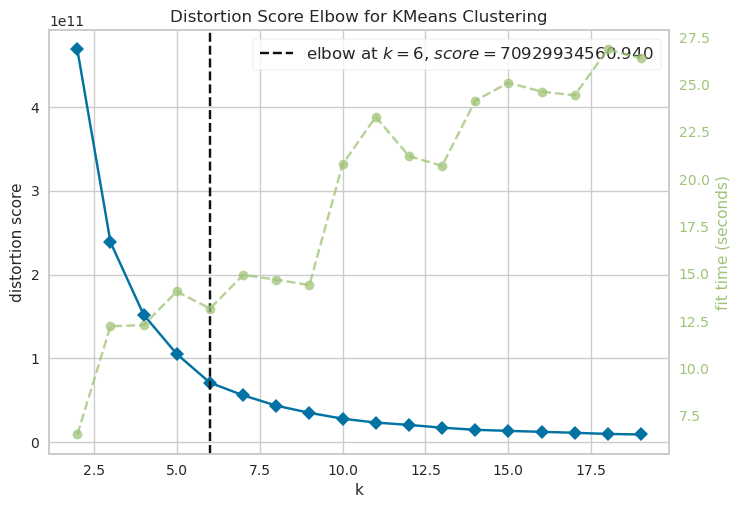

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
kmeans = KMeans(random_state=42, n_init="auto")
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(df[['best_bid_price', 'best_bid_qty', 'best_ask_price', 'best_ask_qty']])
visualizer.show()

In [18]:
kmeans.labels_

array([15,  3, 15, ...,  3,  3,  3], dtype=int32)

In [19]:
kmeans.cluster_centers_

array([[4.30971027e+04, 6.30512819e+00, 4.30972074e+04, 7.58810626e+00],
       [4.27828269e+04, 7.04445117e+00, 4.27829323e+04, 6.62592940e+00],
       [4.29166000e+04, 6.20505014e+00, 4.29167056e+04, 6.11623203e+00],
       [4.32296804e+04, 5.65968567e+00, 4.32297863e+04, 5.99134532e+00],
       [4.26622202e+04, 5.54387669e+00, 4.26623256e+04, 6.79231952e+00],
       [4.30497487e+04, 5.47702734e+00, 4.30498559e+04, 6.45661464e+00],
       [4.31811321e+04, 5.55205385e+00, 4.31812360e+04, 6.10588843e+00],
       [4.28522607e+04, 5.97417388e+00, 4.28523643e+04, 7.11006328e+00],
       [4.25870463e+04, 6.32539824e+00, 4.25871501e+04, 7.25588604e+00],
       [4.33313804e+04, 4.64346265e+00, 4.33314950e+04, 5.22338844e+00],
       [4.29820312e+04, 5.90053076e+00, 4.29821363e+04, 6.21036420e+00],
       [4.27452113e+04, 6.25933001e+00, 4.27453162e+04, 7.66829989e+00],
       [4.28761192e+04, 6.23742222e+00, 4.28762240e+04, 6.27119928e+00],
       [4.26236541e+04, 7.05183817e+00, 4.26237614e